<h1>План исследования<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Импортируем-файлы-и-изучим-данные-в-них" data-toc-modified-id="Шаг-1.-Импортируем-файлы-и-изучим-данные-в-них-1">Шаг 1. Импортируем файлы и изучим данные в них</a></span></li><li><span><a href="#Шаг-2.-Выберем-топ-10-городов-по-количеству-рейсов" data-toc-modified-id="Шаг-2.-Выберем-топ-10-городов-по-количеству-рейсов-2">Шаг 2. Выберем топ-10 городов по количеству рейсов</a></span><ul class="toc-item"><li><span><a href="#2.1.-Вывод" data-toc-modified-id="2.1.-Вывод-2.1">2.1. Вывод</a></span></li></ul></li><li><span><a href="#Шаг-3.-Построим-графики-и-сделаем-выводы-по-каждому-из-них" data-toc-modified-id="Шаг-3.-Построим-графики-и-сделаем-выводы-по-каждому-из-них-3">Шаг 3. Построим графики и сделаем выводы по каждому из них</a></span><ul class="toc-item"><li><span><a href="#3.1.-Какие-модели-самолетов-совершают-больше-всего-рейсов?" data-toc-modified-id="3.1.-Какие-модели-самолетов-совершают-больше-всего-рейсов?-3.1">3.1. Какие модели самолетов совершают больше всего рейсов?</a></span></li><li><span><a href="#3.2.-Топ-10-городов,-куда-совершается-самое-большое-количество-рейсов-(в-среднем)" data-toc-modified-id="3.2.-Топ-10-городов,-куда-совершается-самое-большое-количество-рейсов-(в-среднем)-3.2">3.2. Топ-10 городов, куда совершается самое большое количество рейсов (в среднем)</a></span></li></ul></li><li><span><a href="#Шаг-4.Общий-вывод" data-toc-modified-id="Шаг-4.Общий-вывод-4">Шаг 4.Общий вывод</a></span></li><li><span><a href="#В-заключении)-" data-toc-modified-id="В-заключении)--5"><span style="color: magenta">В заключении) </span></a></span></li></ul></div>

# Аналитика предпочтений пользователей авиакомпании

Нам необходимо проанализировать спрос пассажиров на рейсы в города(только в России, "F9" занимается только внутренними рейсами), где проходят крупнейшие фестивали. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.

## Шаг 1. Импортируем файлы и изучим данные в них

Предварительно мы уже провели исследовательский и статичстический анализы данных и получили (с помощью **SQL**) два датафрейма. Импортируем их под названиями **model_data** и **average_data**.

In [1]:
from scipy import stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model_data = pd.read_csv('/home/kseniya/Downloads/query_1.csv')
model_data

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


**model_data** включает в себя 2 колонки, в которых содержится информация о:

* *'model'* - модели самолета

* *'flights_amount'* - количество рейсов для каждой модели самолетов model в сентябре 2018 года

Из общей информации о таблице мы видим, что количество содержащихся в ней строк - 8. Пропусков нет. А типы данных (**object** и **int64**) вполне подходят для построения нужного нам графика, поэтому менять ничего не будем.

In [4]:
average_data = pd.read_csv('/home/kseniya/Downloads/query_3.csv')
average_data

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [5]:
average_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


**average_data** включает в себя 2 колонки, в которых содержится информация о:

* *'city'* — городах

* *'average_flights'* - среднем количестве рейсов, прибывающих в город за день в августе 2018 года

Из общей информации видно, что таблица содержит 101 строку. Типы данных столбцов - **object** и **float64**.Мы не будем менять тип данных столбца *'average_flights'* ,так как это повлияет на результаты исследования.

##  Шаг 2. Выберем топ-10 городов по количеству рейсов

C помощью метода **sort_values** определим 10 городов, куда в среднем больше всего летали самолеты нашей авиакомпании (напомним,что данные за 1 день в августе 2018 года) и для визуализации сразу построим по отсортированной таблице график:

In [6]:
average_data.nlargest(10, 'average_flights') \
            .reset_index()


,index,city,average_flights
0,43,Москва,129.774194
1,70,Санкт-Петербург,31.161290
2,54,Новосибирск,17.322581
3,33,Красноярск,11.580645
4,20,Екатеринбург,11.322581
5,67,Ростов-на-Дону,10.193548
6,63,Пермь,10.129032
7,10,Брянск,10.000000
8,74,Сочи,9.612903
9,84,Ульяновск,9.580645


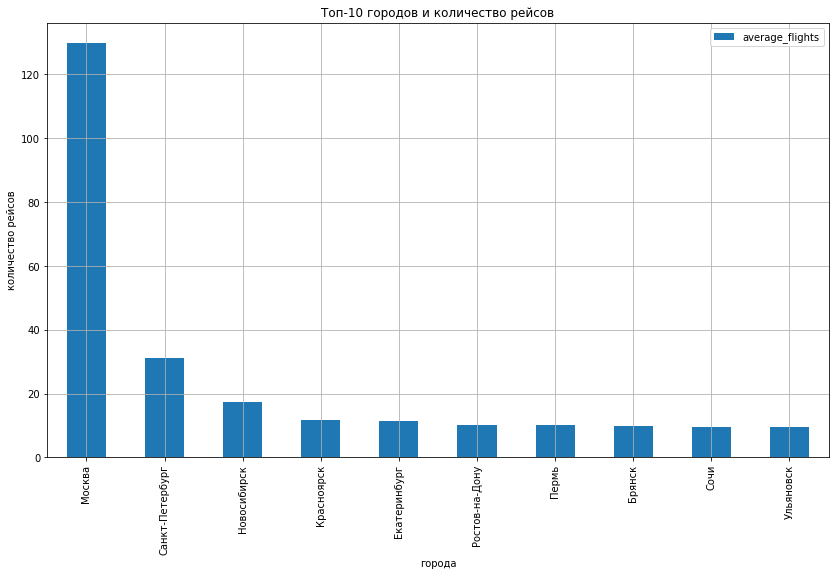

In [7]:
average_data.sort_values(by='average_flights', ascending=False) \
        .head(10) \
        .plot(x='city', y='average_flights',kind="bar", figsize=(14,8), grid=True)
plt.title('Топ-10 городов и количество рейсов')
plt.gca().set(xlabel='города', ylabel='количество рейсов')
plt.show()
        

### 2.1. Вывод

По результатам сортировки и графику мы видим,что с огромным отрывом лидирует **Москва** - в среднем около 129 рейсов (за день!!!). Причин этому может быть несколько:

* Москва - столица России, она является самым крупным транспортным узлом.В Москве располгаются сразу 3 аэропорта, в отличие от других российских городов;

* в Москве пассажиры часто делают пересадки;

* Москва - крупный туристический центр. А в 2018 году (в частности из-за проведения в России Чемпионата мира по футболу) Москва привлекла очень большое количество туристов (как из заграницы, так и российских);

* мы брали один августовский день 2018 года в нашем запросе, возможно, в этот день (или близко  к нему) в Москве мог проходить фестиваль, который мог стать причиной большого наплыва туристов. 

В топ-3 входят **Санкт-Петербург**(31) и **Новосибирск**(17). Это два крупных города (где тоже проходят фестивали), Санкт-Петербург также популярный туристический центр. Но все же обратим внимание, что отрыв между Москвой и Петербургом очень большой - почти в 4 раза больше рейсов летает в Москву. Делаем вывод,что это очень популярное направление.

## Шаг 3. Построим графики и сделаем выводы по каждому из них

### 3.1. Какие модели самолетов совершают больше всего рейсов?

Построим график по датафрейму **model_data**, рассмотрим, какие модели совершают самое большое количество рейсов(напомним, что данные за сентябрь 2018 года):

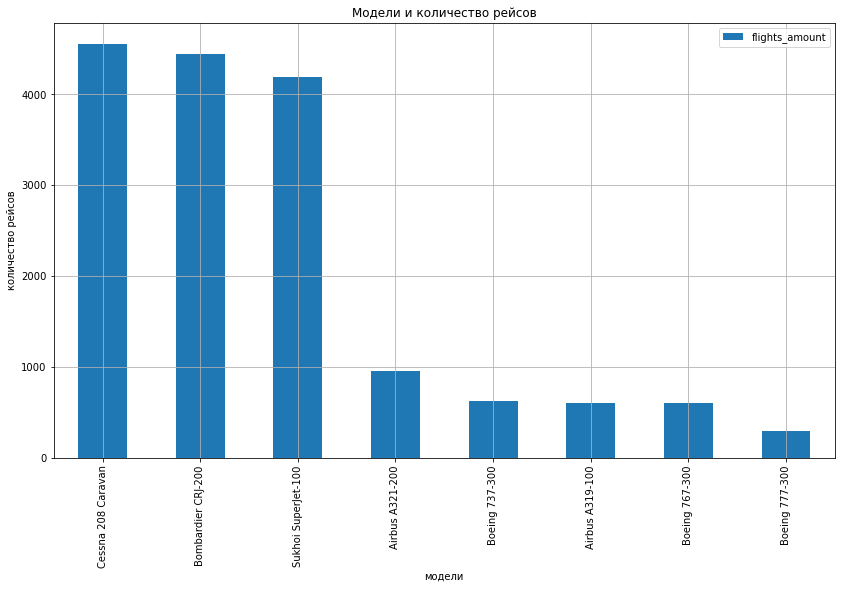

In [8]:
model_data.sort_values(by='flights_amount', ascending=False) \
            .plot(x='model', y='flights_amount',kind="bar", figsize=(14,8), grid=True)
plt.title('Модели и количество рейсов')
plt.gca().set(xlabel='модели', ylabel='количество рейсов')
plt.show()
        

По графику видим, что самое большое количество рейсов (больше 4000) совершили следующие модели:

* **Bombardier CRJ-200**
* **Cessna 208 Caravan**
* **Sukhoi SuperJet-100**

Об этих моделях мы знаем, что они небольшие и ,соответственно, вместительность у них тоже маленькая (*'Sukhoi'* - до 108 человек; *'Bombardier'* - 50; *'Cessna'* - 13 (информация взята с сайтов: https://ru.wikipedia.org/wiki/Bombardier_CRJ200, https://ru.wikipedia.org/wiki/Sukhoi_Superjet_100, https://ru.wikipedia.org/wiki/Cessna_208)). Летают на небольшие расстояния. Отсюда и большое количество рейсов.

Ситуция же с **Boeing 777-300** другая: этот самолет может перевозить до 550 пассажиров и совершать перелеты на расстояния до 17 500 км(информация взята с сайта https://ru.wikipedia.org/wiki/Boeing_777). Соответственно, авиакомпании не выгодно часто пускать в рейс самолет этой модели, так как его эксплуатиция достаточно дорогостоящая. Поэтому количество совершенных им рейсов в месяц гораздо меньше, чем у маленьких самолетов - 300. 

### 3.2. Топ-10 городов, куда совершается самое большое количество рейсов (в среднем)

Построим график по датафрейму **average_data**. До этого мы рассматривали топ-10 городов, куда в среднем совершается самое большое количество рейсов. Теперь посмотрим на всю картину целиком (напомним, что это данные за 1 день августа 2018 года):

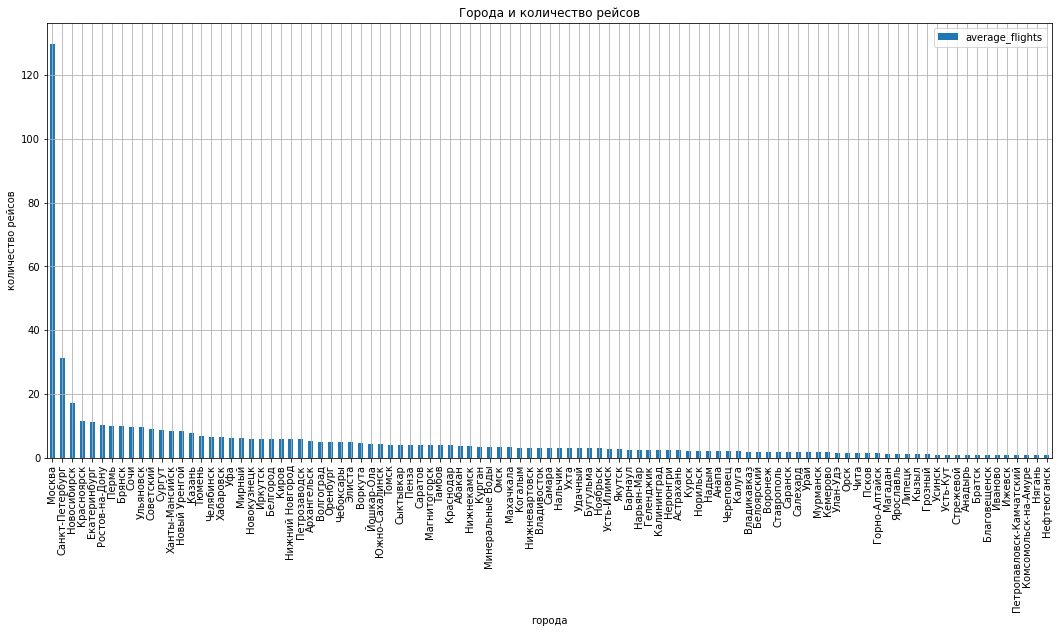

In [9]:
average_data.sort_values(by='average_flights', ascending=False) \
            .plot(x='city', y='average_flights',kind="bar", figsize=(18,8), grid=True)
plt.title('Города и количество рейсов')
plt.gca().set(xlabel='города', ylabel='количество рейсов')
plt.show()
        

Мы уже выяснили,что 3 самых популярных направления:

* **Москва**
* **Санкт-Петербург**
* **Новосибирск**

В случае с остальными городами количество рейсов в среднем не превышает 10. Однако, стоит отметить что разнообразие направлений достаточно велико, и хоть в маленькие города совершается не такое большое количество рейсов (как, например, в Москву), общее количество в среднем совершенных рейсов за день довольно большое.

## Шаг 4.Общий вывод

Предварительно мы уже провели исследовательский и статичстический анализы данных и получили (с помощью **SQL**) два датафрейма. Импортировали их под названиями **model_data** и **average_data**.

C помощью метода **sort_values** мы определили 10 городов, куда в среднем больше всего летали самолеты нашей авиакомпании (напомним,что данные за 1 день в августе 2018 года) и построили по отсортированной таблице график.
С огромным отрывом лидирует **Москва** - в среднем около 129 рейсов (за день!!!). Причин этому может быть несколько:

* Москва - столица России, она является самым крупным транспортным узлом.В Москве располгаются сразу 3 аэропорта, в отличие от других российских городов;

* в Москве пассажиры часто делают пересадки;

* Москва - крупный туристический центр. А в 2018 году (в частности из-за проведения в России Чемпионата мира по футболу) Москва привлекла очень большое количество туристов (как из заграницы, так и российских);

* мы брали один августовский день 2018 года в нашем запросе, возможно, в этот день (или близко  к нему) в Москве мог проходить фестиваль, который мог стать причиной большого наплыва туристов. 

В топ-3 входят **Санкт-Петербург**(31) и **Новосибирск**(17). Это два крупных города (где тоже проходят фестивали), Санкт-Петербург также популярный туристический центр. Но все же обратим внимание, что отрыв между Москвой и Петербургом очень большой - почти в 4 раза больше рейсов летает в Москву. Делаем вывод,что это очень популярное направление.

Мы построим график по датафрейму **model_data**, чтобы рассмотреть, какие модели совершают самое большое количество рейсов(напомним, что данные за сентябрь 2018 года). Самое большое количество рейсов (больше 4000) совершили совсем небольшие, летающие на небольшие расстояния модели:

* **Bombardier CRJ-200**
* **Cessna 208 Caravan**
* **Sukhoi SuperJet-100**

Ситуция же с **Boeing 777-300** другая: этот самолет может перевозить до 550 пассажиров и совершать перелеты на расстояния до 17 500 км(информация взята с сайта https://ru.wikipedia.org/wiki/Boeing_777). Соответственно, авиакомпании не выгодно часто пускать в рейс самолет этой модели, так как его эксплуатиция достаточно дорогостоящая. Поэтому количество совершенных им рейсов в месяц гораздо меньше, чем у маленьких самолетов - 300. 

Также мы построим график по всему датафрейму **average_data**, чтобы посмотреть на всю картину целиком (напомним, что это данные за 1 день августа 2018 года). В случае с остальными городами (за исключением топ-3 городов, про которое мы уже говорили выше) количество рейсов в среднем не превышает 10. Однако, стоит отметить что разнообразие направлений достаточно велико, и хоть в маленькие города совершается не такое большое количество рейсов (как, например, в Москву), общее количество в среднем совершенных рейсов за день довольно большое.